## Visualizing the Dataset

First, we create the handler-class `PACSData`. Afterwards, we get the training and validation dataloaders. These loaders contain the concatenated datasets except for the `test_domain`. We set a `batch_size` of 6 for better visualization.
The label mappings are stored directly in the `PACSData` class. This assumes that there is no label shift across domains.

Lastly, we define a custom `show()` function that helps us visualize the batches with their corresponding labels and call the function on three batches from the train set.

In [36]:
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
from domgen.data import PACSData

pacs = PACSData('../datasets/PACS')

train, val, test = pacs.create_dataloaders(test_domain='photo',
                                           train_batch_size=6,
                                           val_batch_size=6,
                                           shuffle_test=True)

dataset = test.dataset
idx_to_class = pacs.idx_2_class
print(idx_to_class)

def show(img, label):
    fig = plt.figure()
    plt.axis('off')
    plt.imshow(img.permute(1,2,0))
    plt.title(label)

{'dog': 0, 'elephant': 1, 'giraffe': 2, 'guitar': 3, 'horse': 4, 'house': 5, 'person': 6}
{0: 'dog', 1: 'elephant', 2: 'giraffe', 3: 'guitar', 4: 'horse', 5: 'house', 6: 'person'}


### Visualize Grids with Labels

Visualizing batches from the training and test set.

-----------------------------------------------


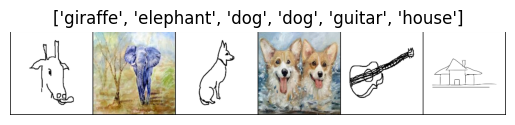

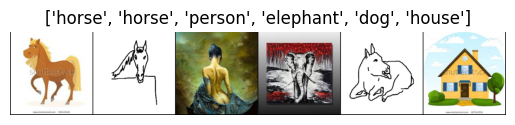

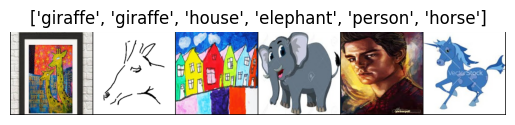

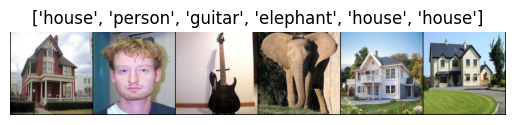

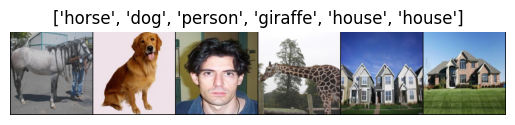

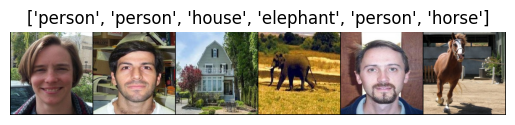

In [38]:
# visualizing from the train set -> there should be no members of the excluded domain
for i in range(3):
    images, labels = next(iter(train))
    grid = make_grid(images, scale_each=True)
    labels = [idx_to_class[label.item()] for label in labels]
    show(grid, labels)
    
# visualizing from the test set -> there should only be members from the excluded domain
for i in range(3):
    images, labels = next(iter(test))
    grid = make_grid(images, scale_each=True)
    labels = [idx_to_class[label.item()] for label in labels]
    show(grid, labels)